# Overpayment
Looking at the relationship between overpayments and amount credited next year. \
Work on by Luke McMahon

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./data/tax_data_2020.csv")
print(df.shape)
df.head(3)

(166452, 165)


,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,ELF,CPREP,...,N85300,A85300,N11901,A11901,N11900,A11900,N11902,A11902,N12000,A12000
0,1,AL,0,1,785000.0,519980.0,85690.0,165290.0,724170.0,22560.0,...,0.0,0.0,57720.0,46577.0,674840.0,1827202.0,672200.0,1818867.0,2900.0,6089.0
1,1,AL,0,2,554310.0,270870.0,121420.0,146470.0,515150.0,13260.0,...,0.0,0.0,81770.0,112540.0,470410.0,1445383.0,466960.0,1432458.0,4660.0,11648.0
2,1,AL,0,3,290630.0,113280.0,124770.0,44570.0,269700.0,6420.0,...,0.0,0.0,70360.0,144380.0,220710.0,626662.0,216530.0,610170.0,5760.0,16235.0


In [3]:
df = df[df.zipcode != 0]
print(df.shape)

(166146, 165)


## Relationship between overpayments and amount credited to next year

#### Is it the same?

In [4]:
df2 = pd.DataFrame()
df2['overpayments'] = df.A11900
df2['amount_returned'] = df.A11902
df2['amount_credited'] = df.A12000

In [5]:
df2['percent_overpayment_accounted_for'] = ((df.A11902+df.A12000)/df.A11900)*100
df2.head(5)

,overpayments,amount_returned,amount_credited,percent_overpayment_accounted_for
6,2807.0,2795.0,0.0,99.572497
7,3378.0,3335.0,62.0,100.562463
8,2131.0,2119.0,0.0,99.436884
9,1282.0,1276.0,0.0,99.531981
10,1967.0,1925.0,139.0,104.931368


In [6]:
df2.percent_overpayment_accounted_for.describe()

count    1.464170e+05
mean              inf
std               NaN
min      0.000000e+00
25%      9.746377e+01
50%      9.979695e+01
75%      1.000000e+02
max               inf
Name: percent_overpayment_accounted_for, dtype: float64

<AxesSubplot: ylabel='Density'>

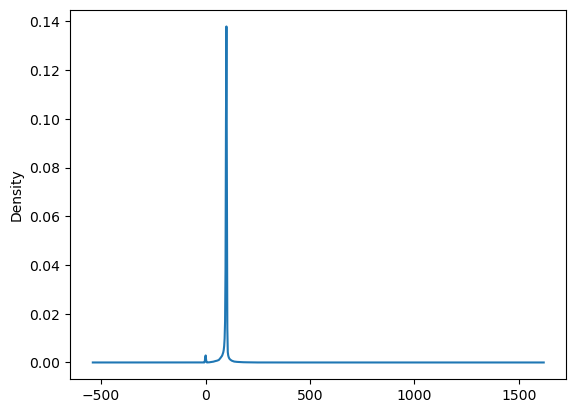

In [7]:
df2.percent_overpayment_accounted_for.replace([np.inf, -np.inf], np.nan, inplace=True)
df2.percent_overpayment_accounted_for.dropna(inplace=True)
df2.percent_overpayment_accounted_for.plot.density()

Seems more or less like overpayments have been accurately returned/credited. Errors in these values is probably due to rounding error.

### A07225 Child and other dependent credit amount

### Curious if this is a flat rate, or if it varies across state, income brackets, etc.

In [8]:
gp = df.groupby(['agi_stub'])['A07225'].mean()
gp

agi_stub
1     40.285812
2    539.883833
3    594.606074
4    502.079062
5    983.926500
6    348.890333
Name: A07225, dtype: float64

Initially, looks like higher income people get more dependent credit. But this could also be that they have more dependents.

(-1000.0, 2000.0)

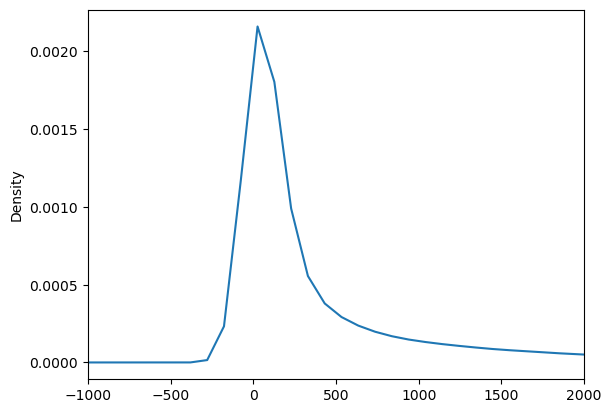

In [9]:
df.A07225.plot.density()
plt.xlim(-1000,2000)

In [10]:
df[df.A07225 < 0].shape

(0, 165)

From density plot, it looks like there are possibly values below 0 for this column, which would not make sense. But it looks like that is just a function of the plot and there are actually no rows with this value below 0.

In [11]:
gp = df.groupby(['STATE'])['A07225'].mean()
gp

STATE
AK     661.621212
AL     321.024510
AR     230.885246
AZ    1014.001131
CA    1146.134615
CO     655.961263
CT     572.045627
DC     809.195652
DE     724.648810
FL     805.378804
GA     637.883960
HI    1030.378531
IA     187.699231
ID     439.884496
IL     445.576021
IN     455.989396
KS     238.636884
KY     273.467911
LA     379.885160
MA     620.982675
MD     698.188531
ME     139.922764
MI     465.617471
MN     365.991983
MO     289.855753
MS     287.690917
MT     204.046338
NC     576.447974
ND     143.390529
NE     210.506303
NH     265.356522
NJ     754.358669
NM     359.807115
NV     982.612821
NY     481.346446
OH     498.274323
OK     299.714591
OR     481.271709
PA     395.737611
RI     614.502381
SC     535.303979
SD     152.754303
TN     460.525663
TX     797.323020
UT    1086.304653
VA     484.698232
VT     105.536723
WA     717.242000
WI     372.481273
WV     125.482283
WY     266.820755
Name: A07225, dtype: float64

<AxesSubplot: xlabel='STATE', ylabel='Mean dependent credit amount'>

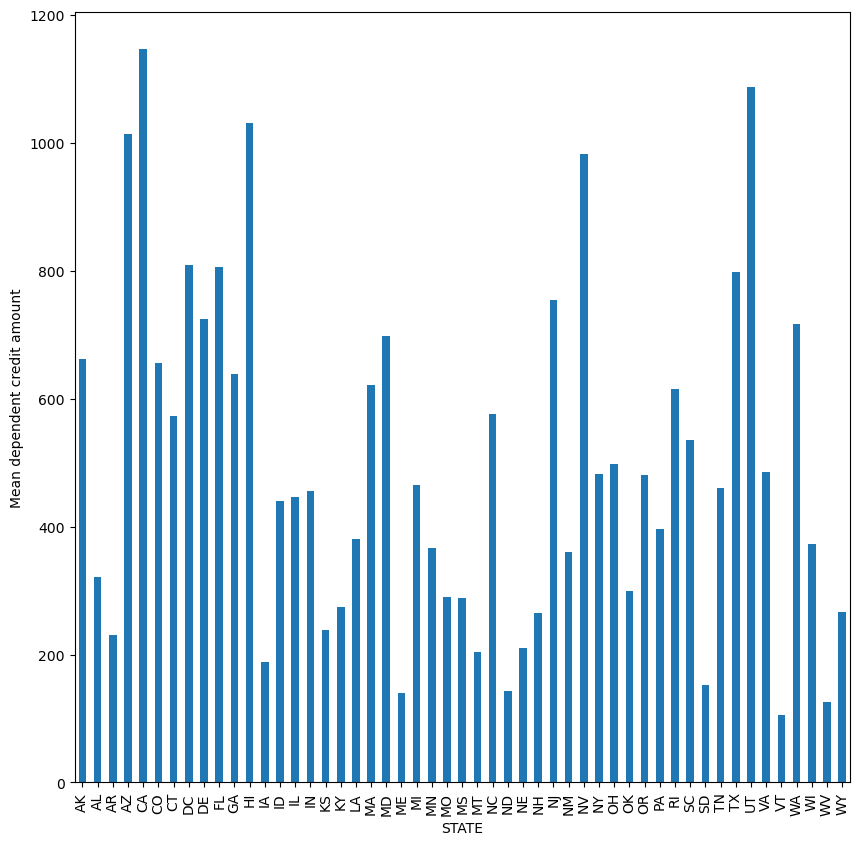

In [12]:
plt.figure(figsize=(10, 10))
plt.xlabel('State')
plt.ylabel('Mean dependent credit amount')
gp.plot.bar()

Seems to be a lot of variation by state, but again this is hard to tell whether this is caused by the average amounts of dependents on these returns or if there are different rates.

My guess would be that there are different rates by state that correlate to the cost of living, but there really is no way to check this without knowing how many dependents were claimed on each return. Since we do not have this information, this is probably a dead end 

### Charitable donation credits

In [13]:
df.groupby(['agi_stub'])['A19700'].mean()

agi_stub
1      38.177879
2     180.994186
3     300.388979
4     321.716329
5    1179.735183
6    4221.661792
Name: A19700, dtype: float64

Seems to be as expected, people with more money have more to give to charities and can get more credit for these donations